# Case Study Based on Geo Spatial Data

Summary : Geo spatial data is a data that includes information realated to locations on the Earth's surface. Here I have done case study on the distribution and availability of parking spaces in a particular city.The task is to check the distribution of parking spaces in the vicinities and compare using different types of charts.

 We use the following libraries:

- `geopandas` to load a GeoJSON dataset.
- `folium` to create an interactive map.
- `matplotlib` for creating bar and pie charts.
- `pandas` for data manipulation.

### Loading the GeoJSON Dataset

We start by loading a GeoJSON dataset. Make sure to replace `'export.geojson'` with the path or URL of your dataset.

```python
gdf = gpd.read_file('export.geojson')

1)Creating an Interactive Map

We create a map centered around Hamburg, Germany using the folium library and initialize variables to count the number of parking spaces.

m = folium.Map(location=[53.5511,9.9937],zoom_start=13)

parking_space=0.

2)Adding Markers to the Map

We iterate through the GeoDataFrame, categorizing parking lots and spaces. We add markers to the map with Font Awesome icons representing them


In [17]:
import folium
import geopandas as gpd

# Read the GeoJSON data into a GeoDataFrame
gdf = gpd.read_file('geospatial.geojson')

# Create a map centered at a specific location
map = folium.Map(location=[53.5511,9.9937], zoom_start=13)

# Create a choropleth layer using the GeoDataFrame
folium.Choropleth(geo_data=gdf, fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2).add_to(map)

# Display the map
map

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the cleaned dataset
cleaned_file_path = "/content/geospatial.geojson"
parking_data = gpd.read_file(cleaned_file_path)

3)Creating Bar and Pie Charts

We use matplotlib to create bar and pie charts to visualize the counts of parking spaces. We also annotate the bars with counts and display the charts.


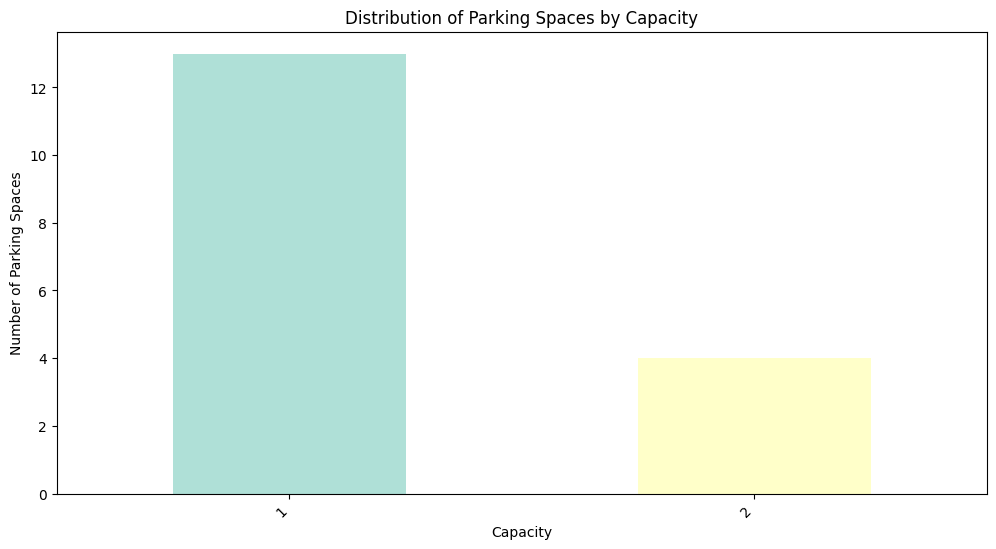

In [ ]:
import numpy as np

# Filter to include only Point geometries
point_data = parking_data[parking_data.geometry.type == 'Point']

# Group by capacity and count occurrences
capacity_counts = point_data['capacity'].value_counts()

# Define a list of colors for the bar chart
colors = plt.cm.Set3(np.arange(len(capacity_counts)))

# Create a bar chart using the specified colors
plt.figure(figsize=(12, 6))
capacity_counts.sort_index().plot(kind='bar', color=colors, alpha=0.7)
plt.title("Distribution of Parking Spaces by Capacity")
plt.xlabel("Capacity")
plt.ylabel("Number of Parking Spaces")
plt.xticks(rotation=45, ha='right')
plt.show()

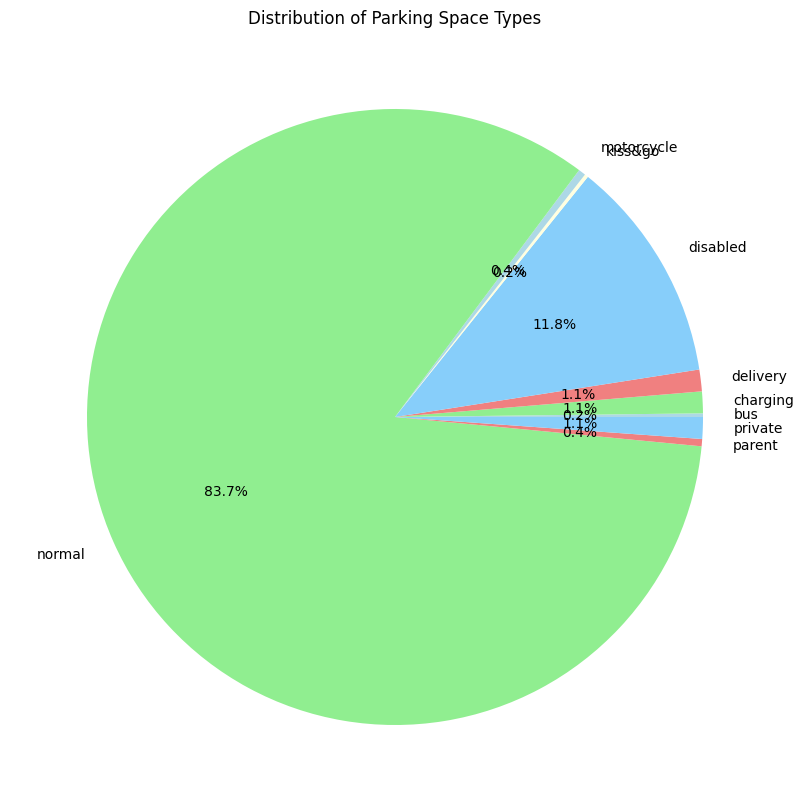

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

cleaned_file_path = "geospatial.geojson"
parking_data = gpd.read_file(cleaned_file_path)

# Assuming parking_data is a DataFrame with a 'parking_space' column
# Group by parking space type and count occurrences
parking_space_type_counts = parking_data['parking_space'].value_counts()

# Sort the values by index (category) to ensure a consistent order
parking_space_type_counts = parking_space_type_counts.sort_index()

# Define colors for each category
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightyellow']

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(parking_space_type_counts, labels=parking_space_type_counts.index, autopct='%1.1f%%', colors=colors)
plt.title("Distribution of Parking Space Types")
plt.show()





4)Creating Heat map for parking spaces

we import folium to show the density of parking spaces in the city.

In [12]:
# Heatmap of parking space density
from folium import plugins
import folium

# Check if the GeoDataFrame is not empty
if not parking_data.empty:
    # Filter to include only Point geometries
    point_data = parking_data[parking_data.geometry.type == 'Point']

    # Check if there are any Point geometries
    if not point_data.empty:
        # Calculate the mean coordinates
        mean_latitude = point_data['geometry'].y.mean()
        mean_longitude = point_data['geometry'].x.mean()

        # Create a map centered on the average coordinates of parking spaces
        parking_map = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=12)

        # Add a heatmap layer based on parking space density
        heat_data = point_data[['geometry', 'capacity']].dropna()
        heat_data = [[point.y, point.x, float(capacity)] for point, capacity in zip(heat_data['geometry'], heat_data['capacity'])]
        plugins.HeatMap(heat_data, min_opacity=0.2, max_zoom=18, radius=15, blur=10, gradient={0.2: 'blue', 0.4: 'purple', 0.6: 'orange', 1: 'red'}).add_to(parking_map)

        # Display the heatmap
        display(parking_map)
    else:
        print("No Point geometries for creating a map.")
else:
    print("No valid geometries for creating a map.")